## ML Zoomcamp Classification Assignment

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# get the dataset
car_pricing = None
try:
    csv_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
    car_pricing = pd.read_csv(csv_url)
    car_pricing = car_pricing
except IOError as e:
    print(e)
car_pricing

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
car_pricing.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
car_pricing.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
cols = ['Make', 'Model', 'Year',  'Engine HP',
           'Engine Cylinders', 'Transmission Type',
           'Vehicle Style', 'highway MPG', 'city mpg', 
           'Popularity', 'MSRP'
          ]
data = car_pricing[cols]

In [6]:
data.head(2)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,3916,40650


In [7]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [8]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# check missing values
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [10]:
data = data.fillna(0)

In [11]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,204,50920


In [12]:
# rename the msrp column
data.rename(columns={"msrp": "price"}, inplace=True)
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'popularity', 'price'],
      dtype='object')

In [13]:
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [14]:
numerical_columns = ['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity'
 ]

In [15]:
data[categorical_columns]

,make,model,transmission_type,vehicle_style
0,BMW,1 Series M,MANUAL,Coupe
1,BMW,1 Series,MANUAL,Convertible
2,BMW,1 Series,MANUAL,Coupe
3,BMW,1 Series,MANUAL,Coupe
4,BMW,1 Series,MANUAL,Convertible
...,...,...,...,...
11909,Acura,ZDX,AUTOMATIC,4dr Hatchback
11910,Acura,ZDX,AUTOMATIC,4dr Hatchback
11911,Acura,ZDX,AUTOMATIC,4dr Hatchback
11912,Acura,ZDX,AUTOMATIC,4dr Hatchback


In [16]:
data[numerical_columns]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,2011,335.0,6.0,26,19,3916
1,2011,300.0,6.0,28,19,3916
2,2011,300.0,6.0,28,20,3916
3,2011,230.0,6.0,28,18,3916
4,2011,230.0,6.0,28,18,3916
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,204
11910,2012,300.0,6.0,23,16,204
11911,2012,300.0,6.0,23,16,204
11912,2013,300.0,6.0,23,16,204


## Question 1

In [17]:
data['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

##### Ans: "AUTOMATIC" transmission has the highest count

## Question 2

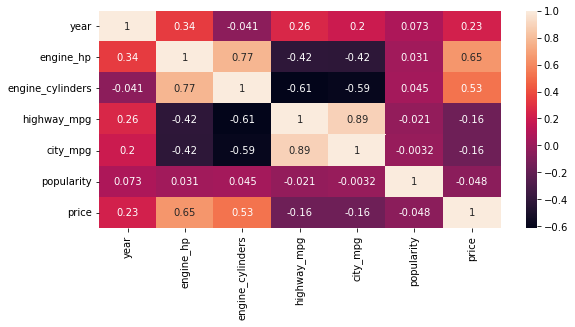



                      year  engine_hp  engine_cylinders  highway_mpg  \
year              1.000000   0.338714         -0.040708     0.258240   
engine_hp         0.338714   1.000000          0.774851    -0.415707   
engine_cylinders -0.040708   0.774851          1.000000    -0.614541   
highway_mpg       0.258240  -0.415707         -0.614541     1.000000   
city_mpg          0.198171  -0.424918         -0.587306     0.886829   
popularity        0.073049   0.031409          0.045226    -0.020991   
price             0.227590   0.650095          0.526274    -0.160043   

                  city_mpg  popularity     price  
year              0.198171    0.073049  0.227590  
engine_hp        -0.424918    0.031409  0.650095  
engine_cylinders -0.587306    0.045226  0.526274  
highway_mpg       0.886829   -0.020991 -0.160043  
city_mpg          1.000000   -0.003217 -0.157676  
popularity       -0.003217    1.000000 -0.048476  
price            -0.157676   -0.048476  1.000000  


In [18]:
plt.figure(figsize=(9,4))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
print('\n')

print(corrMatrix)

In [19]:
# engine_hp and year correlation
data[['engine_hp']].corrwith(data.year).abs()

engine_hp    0.338714
dtype: float64

In [20]:
# engine_hp and engine_cylinders correlation
data[['engine_hp']].corrwith(data.engine_cylinders).abs()

engine_hp    0.774851
dtype: float64

In [21]:
# highway_mpg and engine_cylinders
data[['highway_mpg']].corrwith(data.engine_cylinders).abs()

highway_mpg    0.614541
dtype: float64

In [22]:
# highway_mpg and city_mpg
data[['highway_mpg']].corrwith(data.city_mpg).abs()

highway_mpg    0.886829
dtype: float64

##### Ans: highway_mpg and city_mpg has the biggest correlation

In [23]:
# Make price binary
price_avg = data['price'].mean()
data['above_average'] = data['price'] > price_avg
data['above_average'] = data['above_average'].astype(int)

In [24]:
#import library
#split the data
from sklearn.model_selection import train_test_split

data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [25]:
len(data_train), len(data_val), len(data_test)

(7148, 2383, 2383)

In [26]:
y_train = data_train.above_average.values
y_val = data_val.above_average.values
y_test = data_test.above_average.values

del data_train['above_average']
del data_val['above_average']
del data_test['above_average']

## Question 3

In [27]:
# calculate mutual score

from sklearn.metrics import mutual_info_score

In [28]:
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [29]:
for col in categorical_columns:
    mut_score = mutual_info_score(data_full_train.above_average, data_full_train[col])
    print(f' "{col}" variables has a mutual_score of {mut_score}')
    print()

 "make" variables has a mutual_score of 0.23888341453006923

 "model" variables has a mutual_score of 0.46139654661226426

 "transmission_type" variables has a mutual_score of 0.01941099682472424

 "vehicle_style" variables has a mutual_score of 0.0826587378613731



##### Ans: 'transmission_type' has the lowest mutual information score

## Question 4 (One-Hot Encoding & Accuracy Validation)

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
dv = DictVectorizer(sparse=False)

train_dict = data_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
# train logistic regression with Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [34]:
model.intercept_[0]

-0.060365149566516216

In [35]:
model.coef_[0].round(3)

array([ 3.000e-02, -1.380e-01,  3.600e-02,  6.700e-02,  6.630e-01,
        2.800e-01,  1.840e-01,  2.563e+00,  2.088e+00,  4.700e-02,
        0.000e+00, -6.760e-01,  2.323e+00, -1.548e+00, -8.490e-01,
       -2.720e+00, -1.280e-01,  2.750e-01, -9.570e-01, -8.130e-01,
        6.100e-02,  3.100e-02, -1.330e+00, -1.807e+00,  5.300e-02,
       -1.301e+00,  2.000e-03,  1.876e+00,  1.282e+00,  1.414e+00,
        1.896e+00,  3.930e-01,  1.000e-03, -9.630e-01,  0.000e+00,
        9.840e-01, -7.550e-01, -1.022e+00, -5.460e-01, -2.400e-02,
       -1.508e+00,  1.080e+00,  2.890e-01,  6.730e-01, -9.700e-02,
        4.000e-02, -1.307e+00, -8.760e-01,  1.127e+00, -6.970e-01,
       -8.260e-01,  1.064e+00, -2.400e-02,  3.600e-02, -1.800e-02,
       -6.000e-03, -3.000e-03, -1.000e-03, -2.940e-01, -2.920e-01,
       -2.000e-03, -1.000e-03, -2.000e-03, -7.800e-02, -6.900e-02,
        9.800e-02, -7.900e-02, -1.000e-01, -7.200e-02, -7.200e-02,
       -6.000e-02, -0.000e+00, -2.000e-03, -4.720e-01,  2.110e

In [36]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.60804549, 0.03172303, 0.54376495, ..., 0.00676896, 0.99998974,
       0.08366   ])

In [37]:
y_avg = (y_pred >= 0.5)

In [38]:
total_acc = round((y_val == y_avg).mean(), 2)
total_acc 

0.92

##### Ans: 0.95 is the closest to the answer

## Question 5

##### Feature Elimination

In [39]:
numerical_columns

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [40]:
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

##### Excluding year variables

In [41]:
non_year_cols = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
train_dict = data_train[categorical_columns + non_year_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical_columns + non_year_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_avg = (y_pred >= 0.5)
ny_acc = (y_val == y_avg).mean()

# print(ny_acc)
print(total_acc - ny_acc)

-0.014116659672681497


##### Excluding engine_hp variables

In [42]:
non_eng_cols = ['year', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
train_dict = data_train[categorical_columns + non_eng_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical_columns + non_eng_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_avg = (y_pred >= 0.5)
ne_acc = (y_val == y_avg).mean()

# print(ne_acc)
print(total_acc - ne_acc)

0.021972303818715955


##### Excluding transmission_type variables

In [43]:
non_trans_cols = ['make', 'model', 'vehicle_style']
train_dict = data_train[non_trans_cols + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[non_trans_cols + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_avg = (y_pred >= 0.5)
nt_acc = (y_val == y_avg).mean()

# print(nt_acc)
print(total_acc - nt_acc)

-0.006143516575744856


##### Excluding city_mpg variables

In [44]:
non_city_cols = ['year', 'engine_cylinders', 'highway_mpg', 'engine_hp','popularity']
train_dict = data_train[categorical_columns + non_city_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val[categorical_columns + non_city_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_avg = (y_pred >= 0.5)
nc_acc = (y_val == y_avg).mean()

# print(ne_acc)
print(total_acc - nc_acc) 

-0.02208980276961814


##### Ans: 'transmission_type' has the snallest difference

## Question 6

In [45]:
data.price

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: price, Length: 11914, dtype: int64

In [46]:
# applying log transformation to 'price'
pr_train = np.log1p(data_train.price.values)
pr_val = np.log1p(data_val.price.values)
pr_test = np.log1p(data_test.price.values)

In [47]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [48]:
#import the ridge regression model
from sklearn.linear_model import Ridge

In [49]:
for a in [0, 0.01, 0.1, 1, 10]:
    clf = Ridge(solver="sag", alpha=a, random_state=42) #seed to 42
    clf.fit(X_train, pr_train)
    y_pred = clf.predict(X_val)
    rounded_values = np.round(rmse(pr_val, y_pred), 3) # 3 decimal digits
    print(f'RMSE value with {a} gives: {rounded_values}')

RMSE value with 0 gives: 0.526
RMSE value with 0.01 gives: 0.526
RMSE value with 0.1 gives: 0.526
RMSE value with 1 gives: 0.526
RMSE value with 10 gives: 0.526


##### Ans: 0 is selected with the smallest alpha